# 🏆 05 - Experiment Comparison & Model Selection

## 📑 Table of Contents
1. [🎯 Objectives](#-objectives)
2. [⚙️ Setup & Imports](#-setup--imports)
3. [📊 Load All Experiment Results](#-load-all-experiment-results)
4. [📈 Results Overview](#-results-overview)
5. [🔍 Detailed Analysis by Approach](#-detailed-analysis-by-approach)
6. [🥇 Best Model Selection](#-best-model-selection)
7. [📋 Final Recommendation](#-final-recommendation)

# 🎯 Objectives
- Compare all experiment results across different approaches
- Identify the best performing model based on F1 score
- Provide recommendations for final model selection



---

## **⚙️ 1. Setup & Imports**


In [6]:
# Add project root to path
import sys
import os
sys.path.append(os.path.abspath('..'))

import warnings
warnings.filterwarnings("ignore")

# ⚙️ Setup & Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.experiment_tracker import load_experiment_results, get_best_experiment

plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline



---

## **📥 2. Load All Experiment Results**


In [7]:
# 📊 Load All Experiment Results
print("📁 Loading all experiment results...")
results_df = load_experiment_results()

if results_df.empty:
    print("❌ No experiment results found!")
else:
    print(f"✅ Loaded {len(results_df)} experiments")
    print(f"🔧 Experiment types: {results_df['experiment_type'].unique().tolist()}")
    
    # Display latest results
    latest_results = results_df.sort_values('timestamp', ascending=False).head()
    display(latest_results)
    display(results_df)


📁 Loading all experiment results...
✅ Loaded 27 experiments
🔧 Experiment types: ['traditional_nlp', 'sentence_transformers']


,experiment_type,model_name,preprocessing,accuracy,precision,recall,f1_score,roc_auc,dataset,notes,experiment_id,timestamp
26,sentence_transformers,SVC,aggressive,0.887470,0.870313,0.91100,0.890192,0.953622,fake_news,"Features: ['title_length', 'title_word_count',...",se_s_20250903_210300,2025-09-03T21:03:00.697856
25,sentence_transformers,SVC,aggressive,0.887470,0.870313,0.91100,0.890192,0.953622,fake_news,"Features: ['title_length', 'title_word_count',...",se_s_20250903_205733,2025-09-03T20:57:33.017671
24,sentence_transformers,SVC,aggressive,0.954187,0.946877,0.96250,0.954624,0.990369,fake_news,"Features: ['clean_text', 'title_length', 'titl...",se_s_20250903_204847,2025-09-03T20:48:47.182644
23,sentence_transformers,SVC,aggressive,0.954813,0.948042,0.96250,0.955216,0.990347,fake_news,"Features: ['clean_text', 'year', 'quarter', 'i...",se_s_20250903_202343,2025-09-03T20:23:43.427192
22,sentence_transformers,SVC,aggressive,0.954062,0.947304,0.96175,0.954472,0.990228,fake_news,"Features: ['clean_text', 'title_length', 'titl...",se_s_20250903_195414,2025-09-03T19:54:14.666084


,experiment_type,model_name,preprocessing,accuracy,precision,recall,f1_score,roc_auc,dataset,notes,experiment_id,timestamp
0,traditional_nlp,Logistic Regression,original,0.943923,0.930859,0.95925,0.944841,0.987698,fake_news,TF-IDF with original processing,tr_lr_20250902_231836,2025-09-02T23:18:36.927944
1,traditional_nlp,Random Forest,original,0.933659,0.928607,0.93975,0.934145,0.982709,fake_news,TF-IDF with original processing,tr_rf_20250902_231837,2025-09-02T23:18:37.577347
2,traditional_nlp,SVM,original,0.949556,0.940269,0.96025,0.950155,0.988874,fake_news,TF-IDF with original processing,tr_s_20250902_231841,2025-09-02T23:18:41.886275
3,traditional_nlp,Naive Bayes,original,0.933033,0.940056,0.92525,0.932594,0.983121,fake_news,TF-IDF with original processing,tr_nb_20250902_231841,2025-09-02T23:18:41.949688
4,traditional_nlp,Logistic Regression,stemmed,0.944424,0.931763,0.95925,0.945307,0.987025,fake_news,TF-IDF with stemmed processing,tr_lr_20250902_231842,2025-09-02T23:18:42.792748
5,traditional_nlp,Random Forest,stemmed,0.930655,0.926063,0.93625,0.931129,0.980929,fake_news,TF-IDF with stemmed processing,tr_rf_20250902_231844,2025-09-02T23:18:44.102883
6,traditional_nlp,SVM,stemmed,0.946426,0.937102,0.95725,0.947069,0.987909,fake_news,TF-IDF with stemmed processing,tr_s_20250902_231849,2025-09-02T23:18:49.561800
7,traditional_nlp,Naive Bayes,stemmed,0.931030,0.936914,0.92450,0.930666,0.981386,fake_news,TF-IDF with stemmed processing,tr_nb_20250902_231850,2025-09-02T23:18:50.396857
8,traditional_nlp,Logistic Regression,lemmatized,0.942546,0.930255,0.95700,0.943438,0.986540,fake_news,TF-IDF with lemmatized processing,tr_lr_20250902_231850,2025-09-02T23:18:50.805605
9,traditional_nlp,Random Forest,lemmatized,0.927776,0.921863,0.93500,0.928385,0.979589,fake_news,TF-IDF with lemmatized processing,tr_rf_20250902_231851,2025-09-02T23:18:51.723792



---

## **📈 3. Results Overview**


In [8]:
# 📈 Results Overview
if not results_df.empty:
    print("📊 Results Overview:")
    print("=" * 50)
    
    # Summary statistics
    summary = results_df.groupby(['experiment_type', 'model_name', 'preprocessing']).agg({
        'f1_score': ['mean', 'std', 'count'],
        'accuracy': ['mean', 'std'],
        'precision': ['mean'],
        'recall': ['mean'],
        'roc_auc': ['mean']
    }).round(4)
    
    display(summary)
    
    # Sort by F1 score (your primary metric)
    best_by_f1 = results_df.sort_values('f1_score', ascending=False).head(10)
    print("🏆 Top 10 Experiments by F1 Score:")
    display(best_by_f1[['experiment_type', 'model_name', 'preprocessing', 'f1_score', 'accuracy']])


📊 Results Overview:


f1_score          \
                                                             mean     std   
experiment_type       model_name          preprocessing                     
sentence_transformers LightGBM            aggressive       0.9376  0.0000   
                      Logistic Regression basic_cleaning   0.9311     NaN   
                      Random Forest       basic_cleaning   0.9197     NaN   
                      SVC                 aggressive       0.9334  0.0335   
                      SVM                 aggressive       0.9557     NaN   
                                          basic            0.9483  0.0021   
                                          basic_cleaning   0.9396     NaN   
                      XGBoost             aggressive       0.9398     NaN   
traditional_nlp       Logistic Regression lemmatized       0.9434     NaN   
                                          original         0.9448     NaN   
                                          stemmed          0.9453     NaN   
                      Naive Bayes         lemmatized       0.9296     NaN   
                                          original         0.9326     NaN   
                                          stemmed          0.9307     NaN   
                      Random Forest       lemmatized       0.9284     NaN   
                                          original         0.9341     NaN   
                                          stemmed          0.9311     NaN   
                      SVM                 lemmatized       0.9484     NaN   
                                          original         0.9502     NaN   
                                          stemmed          0.9471     NaN   

                                                               accuracy  \
                                                         count     mean   
experiment_type       model_name          preprocessing                   
sentence_transformers LightGBM            aggressive         2   0.9370   
                      Logistic Regression basic_cleaning     1   0.9304   
                      Random Forest       basic_cleaning     1   0.9180   
                      SVC                 aggressive         6   0.9322   
                      SVM                 aggressive         1   0.9553   
                                          basic              2   0.9479   
                                          basic_cleaning     1   0.9388   
                      XGBoost             aggressive         1   0.9395   
traditional_nlp       Logistic Regression lemmatized         1   0.9425   
                                          original           1   0.9439   
                                          stemmed            1   0.9444   
                      Naive Bayes         lemmatized         1   0.9300   
                                          original           1   0.9330   
                                          stemmed            1   0.9310   
                      Random Forest       lemmatized         1   0.9278   
                                          original           1   0.9337   
                                          stemmed            1   0.9307   
                      SVM                 lemmatized         1   0.9477   
                                          original           1   0.9496   
                                          stemmed            1   0.9464   

                                                                 precision  \
                                                             std      mean   
experiment_type       model_name          preprocessing                      
sentence_transformers LightGBM            aggressive      0.0000    0.9306   
                      Logistic Regression basic_cleaning     NaN    0.9233   
                      Random Forest       basic_cleaning     NaN    0.9027   
                      SVC                 aggressive      0.0347    0.9221   
             

🏆 Top 10 Experiments by F1 Score:


,experiment_type,model_name,preprocessing,f1_score,accuracy
21,sentence_transformers,SVC,aggressive,0.955658,0.955314
15,sentence_transformers,SVM,aggressive,0.955658,0.955314
23,sentence_transformers,SVC,aggressive,0.955216,0.954813
24,sentence_transformers,SVC,aggressive,0.954624,0.954187
22,sentence_transformers,SVC,aggressive,0.954472,0.954062
2,traditional_nlp,SVM,original,0.950155,0.949556
16,sentence_transformers,SVM,basic,0.949751,0.949430
10,traditional_nlp,SVM,lemmatized,0.948395,0.947678
6,traditional_nlp,SVM,stemmed,0.947069,0.946426
17,sentence_transformers,SVM,basic,0.946753,0.946426



---

## **🔍 4. Detailed Analysis by Approach**


📈 Detailed Analysis by Approach:


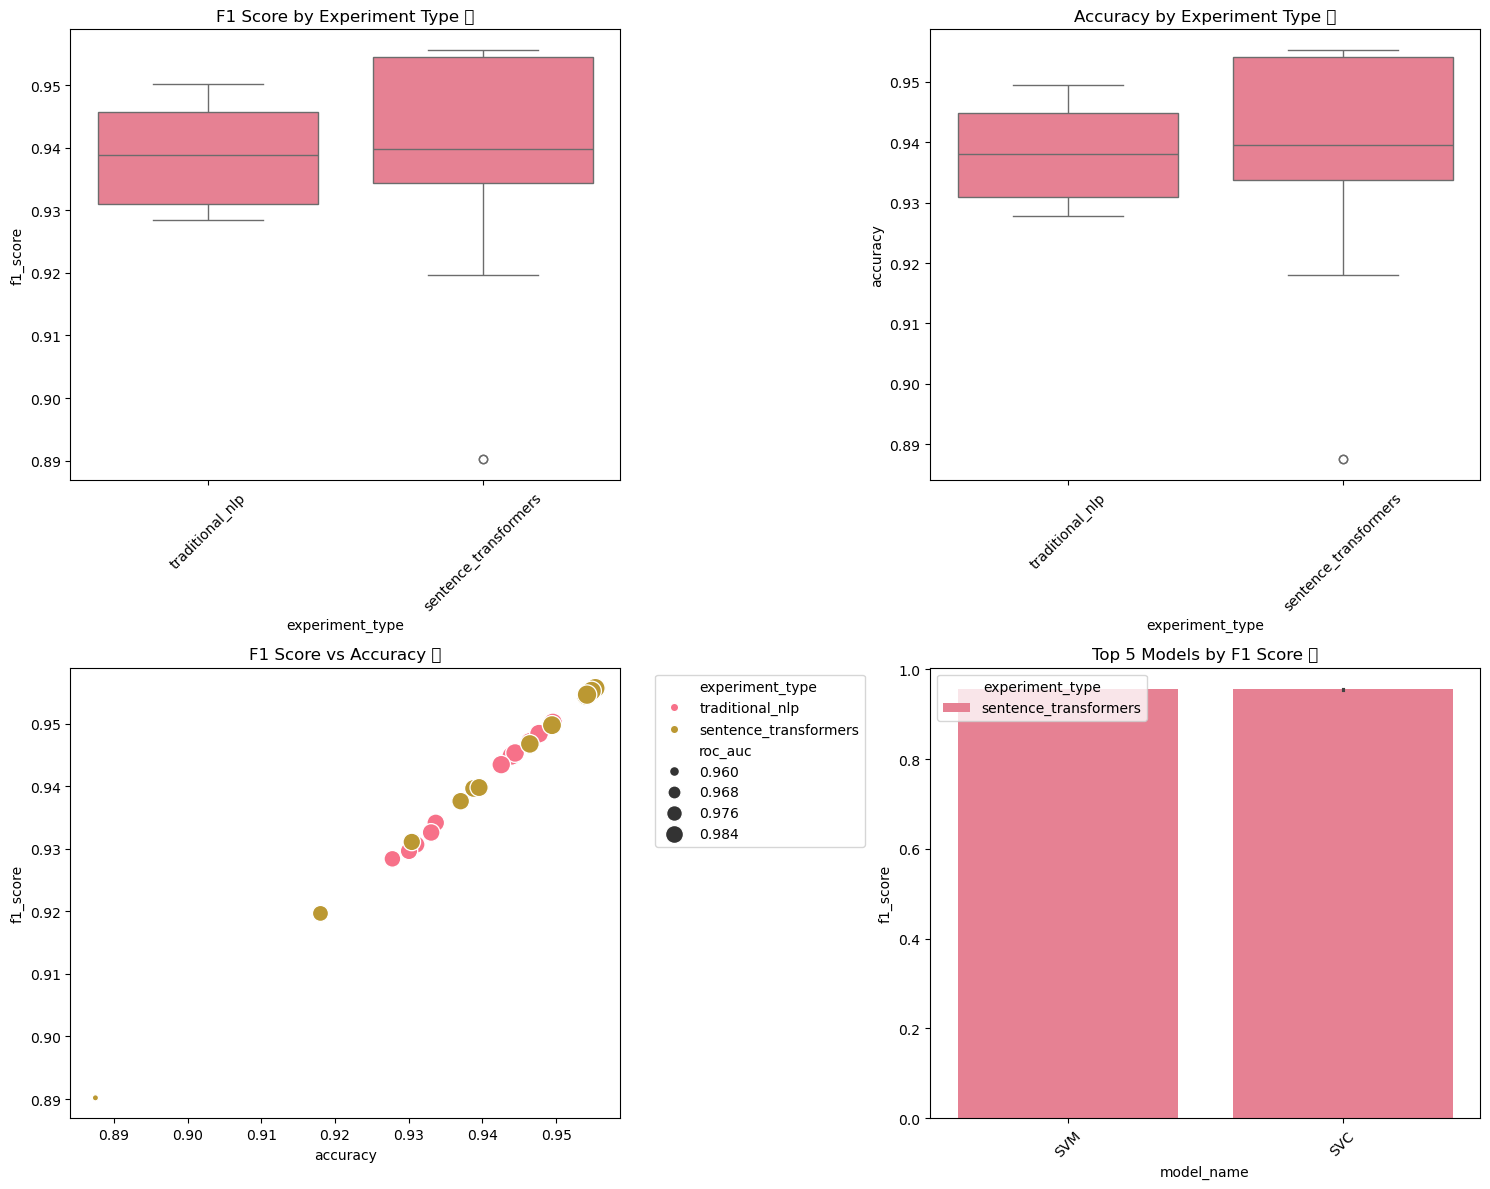

🥇 Best Model Selection:
🎉 BEST OVERALL EXPERIMENT:
   experiment_type: sentence_transformers
   model_name: SVM
   preprocessing: aggressive
   accuracy: 0.955313556139692
   precision: 0.9496420636879784
   recall: 0.96175
   f1_score: 0.9556576822754936
   roc_auc: 0.9907214214088744
   dataset: fake_news
   notes: Features: ['clean_text']
   experiment_id: se_s_20250903_131104
   timestamp: 2025-09-03T13:11:04.602249

🔍 Best by Accuracy: SVM (sentence_transformers) - 0.9553


In [9]:
# 🔍 Detailed Analysis by Approach
if not results_df.empty:
    print("📈 Detailed Analysis by Approach:")
    print("=" * 50)
    
    # Create visualizations
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. F1 Score by Experiment Type
    sns.boxplot(data=results_df, x='experiment_type', y='f1_score', ax=axes[0, 0])
    axes[0, 0].set_title('F1 Score by Experiment Type 🎯')
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # 2. Accuracy by Experiment Type
    sns.boxplot(data=results_df, x='experiment_type', y='accuracy', ax=axes[0, 1])
    axes[0, 1].set_title('Accuracy by Experiment Type 📊')
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # 3. F1 vs Accuracy Scatter
    sns.scatterplot(data=results_df, x='accuracy', y='f1_score', hue='experiment_type', 
                    size='roc_auc', sizes=(20, 200), ax=axes[1, 0])
    axes[1, 0].set_title('F1 Score vs Accuracy 📍')
    axes[1, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # 4. Best Models Highlight
    top_models = results_df.nlargest(5, 'f1_score')
    sns.barplot(data=top_models, x='model_name', y='f1_score', hue='experiment_type', ax=axes[1, 1])
    axes[1, 1].set_title('Top 5 Models by F1 Score 🏆')
    axes[1, 1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

# 🥇 Best Model Selection
if not results_df.empty:
    print("🥇 Best Model Selection:")
    print("=" * 50)
    
    # Get best experiment based on F1 score
    best_experiment = get_best_experiment(results_df, 'f1_score')
    
    print("🎉 BEST OVERALL EXPERIMENT:")
    for key, value in best_experiment.items():
        print(f"   {key}: {value}")
    
    # Also show best by accuracy for comparison
    best_by_accuracy = get_best_experiment(results_df, 'accuracy')
    print(f"\n🔍 Best by Accuracy: {best_by_accuracy['model_name']} "
          f"({best_by_accuracy['experiment_type']}) - {best_by_accuracy['accuracy']:.4f}")


---

## **📋 5. Final Recommendation**

In [10]:
# 📋 Final Recommendation
if not results_df.empty:
    print("\n📋 Final Recommendation:")
    print("=" * 50)
    
    # Analyze trade-offs
    high_f1 = results_df[results_df['f1_score'] >= 0.9]  # Adjust threshold as needed
    if not high_f1.empty:
        best_combo = high_f1.sort_values('accuracy', ascending=False).iloc[0]
        
        print("🚀 DEPLOYMENT RECOMMENDATION:")
        print(f"   Model: {best_combo['model_name']}")
        print(f"   Approach: {best_combo['experiment_type']}")
        print(f"   Preprocessing: {best_combo['preprocessing']}")
        print(f"   Expected F1: {best_combo['f1_score']:.3f}")
        print(f"   Expected Accuracy: {best_combo['accuracy']:.3f}")
        
        # Additional considerations
        print("\n💡 ADDITIONAL CONSIDERATIONS:")
        if best_combo['experiment_type'] == 'sentence_transformers':
            print("   - Modern approach with better context understanding")
            print("   - May require more computational resources")
        else:
            print("   - Traditional approach with good interpretability")
            print("   - Generally faster training and prediction")
    else:
        print("⚠️ No model reached the desired F1 threshold. Consider:")
        print("   - Trying different hyperparameters")
        print("   - Adding more data")
        print("   - Trying more advanced models (e.g., transformers)")


📋 Final Recommendation:
🚀 DEPLOYMENT RECOMMENDATION:
   Model: SVM
   Approach: sentence_transformers
   Preprocessing: aggressive
   Expected F1: 0.956
   Expected Accuracy: 0.955

💡 ADDITIONAL CONSIDERATIONS:
   - Modern approach with better context understanding
   - May require more computational resources
